In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('finally.dat',sep="\s+",usecols = [0,1,5,8,9])
def find(a,b):
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])
def find_plate(a,b):
    a = 270 + a/2
    b = 28 +b/2
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])
def find_pol(a,b):
    a = 270 + a/2
    b = 28 +b/2
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])

In [51]:
def pvv(a,b,theta,phi):
    a = a/180*np.pi
    b = b/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))
    

In [50]:
def pvv_f(ab,theta,phi):
    a = ab[0]/180*np.pi
    b = ab[1]/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))
    

In [28]:
find_plate(45,45)

,A,B,AB,HWP_A,HWP_B
66,57321.2,106433.53,478.92,292.5,50.5


In [19]:
alphas = np.unique(data['HWP_A'].values)
betas = np.unique(data['HWP_B'].values)

In [20]:
alphas[1:]

array([236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75, 315.  ])

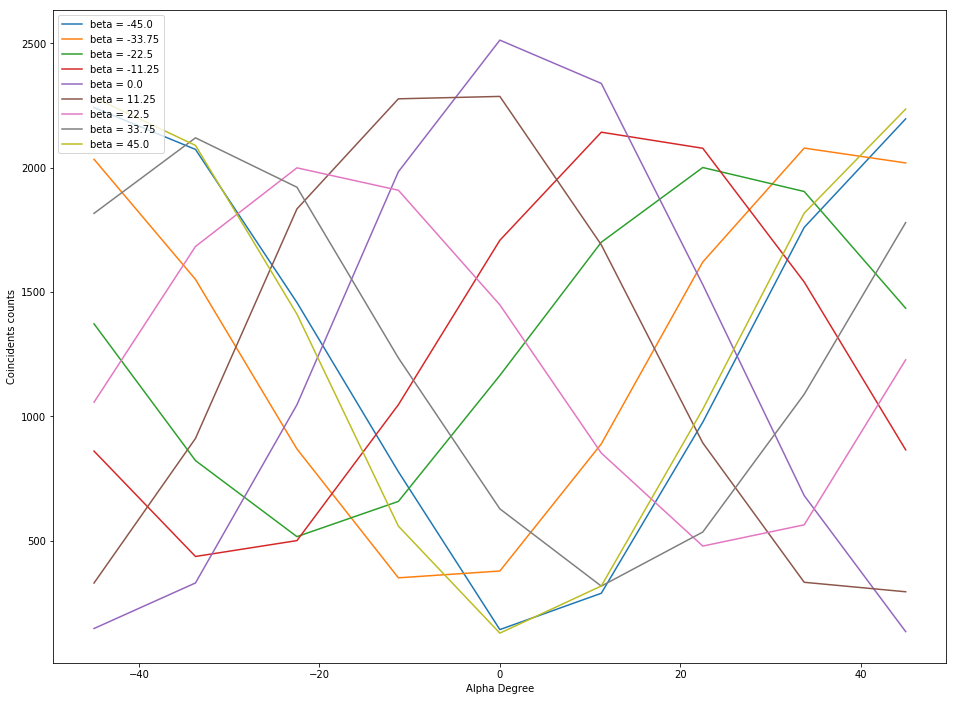

In [40]:
fig, ax = plt.subplots(figsize = (16,12))

for b in betas:    
    counts = []
    for i in alphas: 
        counts += [find(i,b)['AB'].values[0]]
    ax.plot(np.array(alphas)-270,counts, label = 'beta = {}'.format(b-28))
ax.set_xlabel('Alpha Degree')
ax.set_ylabel('Coincidents counts')
plt.legend()

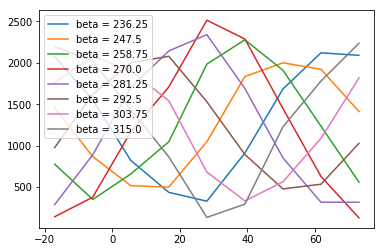

In [9]:
for a in alphas:    
    counts = []
    for b in betas:
        counts += [find(a,b)['AB'].values[0]]
    plt.plot(betas,counts, label = 'beta = {}'.format(a))
    
plt.legend()

Taking alpha as fixed and beta as mobile, we find the contrast of our measurement:

In [48]:
counts = []
b = 28
for i in alphas:
    counts += [find(i,b)['AB'].values[0]]

In [49]:
(max(counts)-min(counts))/(max(counts)+min(counts))

0.8980683899473197

In [44]:
counts = []
b = 28+45
for i in alphas:
    counts += [find(i,b)['AB'].values[0]]

In [45]:
(max(counts)-min(counts))/(max(counts)+min(counts))

0.8931527526664124

In [46]:
b

73

In [47]:
counts

[2282.65, 2089.83, 1411.43, 559.05, 128.83, 318.36, 1029.0, 1817.39, 2235.88]

In [56]:
count = {}
for b in betas:    
    counts = []
    for i in alphas: 
        counts += [find(i,b)['AB'].values[0]]
        count[i-270,b-28] = find(i,b)['AB'].values[0]

In [90]:
def prob(a,b):
    if (a>0) & (b>0):
        a_p = a-45
        b_p = b-45
    elif (a>0) & (b<=0):
        a_p = a-45
        b_p = b+45
    elif (a<=0) & (b>0):
        a_p = a+45
        b_p = b-45
    elif (a<=0) & (b<=0):
        a_p = 45+a
        b_p = 45+b
    if (int(100*a)%1125==0)&(int(100*b)%1125==0):
        count_vv = count[(a,b)]
        count_hv = count[(a_p,b)]
        count_vh = count[(a,b_p)]
        count_hh = count[(a_p,b_p)]
    return(count_vv/(count_vv+count_hv+count_vh+count_hh))    
        

In [81]:
prob(11.25,11.25)

0.3351399052095108

In [84]:
angles = np.array(alphas)-270

In [86]:
angles

array([-45.  , -33.75, -22.5 , -11.25,   0.  ,  11.25,  22.5 ,  33.75,
        45.  ])

In [91]:
for i in angles:
    print(prob(i,-i))

0.45004396635686483
0.4225144421705402
0.40021896466142537
0.4517520279800743
0.5013385839338009
0.42702394640405394
0.400481161833699
0.41244026162877206
0.4403938457096802
